In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from fastai.vision.all import *
import os

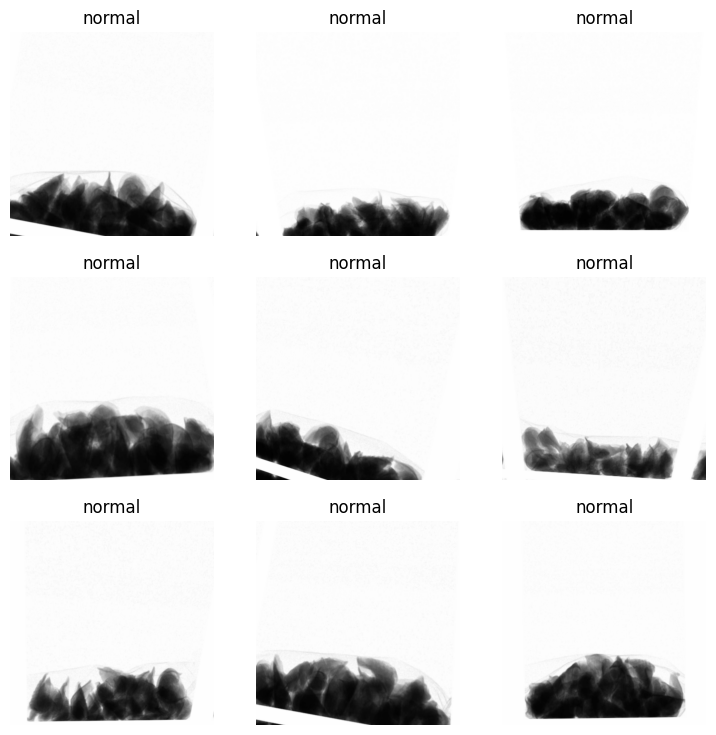

In [5]:
# Google Drive 경로에서 '정상' 샘플만 사용
path = '/content/drive/MyDrive/Colab Notebooks/01.ML/01_cj_project/datasets/img_cls/fm_img_hori/train/good'
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path),
    label_func=lambda x: 'normal',  # 모든 샘플을 '정상'으로 레이블
    item_tfms=Resize(460),
    batch_tfms=aug_transforms()
)

dls.show_batch()

In [6]:
# 모델 훈련
learn = cnn_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(10)

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593

epoch,train_loss,valid_loss,accuracy,time
0,0.000000,0.000000,1.000000,00:15


epoch,train_loss,valid_loss,accuracy,time
0,0.000000,0.000000,1.000000,00:04
1,0.000000,0.000000,1.000000,00:03
2,0.000000,0.000000,1.000000,00:03
3,0.000000,0.000000,1.000000,00:03
4,0.000000,0.000000,1.000000,00:03
5,0.000000,0.000000,1.000000,00:03
6,0.000000,0.000000,1.000000,00:03
7,0.000000,0.000000,1.000000,00:03
8,0.000000,0.000000,1.000000,00:03
9,0.000000,0.000000,1.000000,00:03


In [7]:
# Novelty Detection 함수
def is_novel(img_path):
    img = PILImage.create(img_path)
    pred, _, probs = learn.predict(img)
    # '정상' 샘플에 대한 확률을 기준으로 판단
    if probs[0] < 0.7:  # 임계값은 조정 가능
        return 'Novel'
    else:
        return 'Normal'

In [12]:
# 새로운 이미지에 적용 (이미지 경로는 적절하게 설정해주세요)
result = is_novel('/content/drive/MyDrive/Colab Notebooks/01.ML/01_cj_project/datasets/img_cls/fm_img_hori/train/ng/2022-12-27-150900710.jpg')
print(result)

Normal
